# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline


APPLY_GRIDSEARCH = False
DATA_PATH="data/"
FILTER_DIRECTION = False


print(sorted(os.listdir(DATA_PATH)))

['DP980GA_Galma1_upgrade.csv', 'DP980GI_SDG3-v2_20220208_upgrade.csv', 'DP980GI_SDG3.5_20220208_upgrade.csv', 'DP980Y700_EKO1_upgrade.csv', 'DP980Y700_SDG3_2021_upgrade.csv', 'DP980_Sagunto_2021_upgrade.csv']


# Chargement des données
Utilisation d'une dataframe panda

In [3]:
df1 = pd.read_csv(DATA_PATH + 'DP980Y700_SDG3_2021_upgrade.csv', delimiter =";", decimal=",")
df2 = pd.read_csv(DATA_PATH + 'DP980GA_Galma1_upgrade.csv', delimiter =";", decimal=",")
df3 = pd.read_csv(DATA_PATH + 'DP980Y700_EKO1_upgrade.csv', delimiter =";", decimal=",")
df4 = pd.read_csv(DATA_PATH + 'DP980_Sagunto_2021_upgrade.csv', delimiter =";", decimal=",")
df5 = pd.read_csv(DATA_PATH + 'DP980GI_SDG3-v2_20220208_upgrade.csv', delimiter =";", decimal=",")
df6 = pd.read_csv(DATA_PATH + 'DP980GI_SDG3.5_20220208_upgrade.csv', delimiter =";", decimal=",")

frames = [df1, df2, df3, df4, df5, df6]

df = pd.concat(frames, ignore_index=True)
df = df.fillna(0) # replace NaN by 0

# Description des données

In [4]:
df.head()

,Coilnr,Date,Direction,Type,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,C ppm,Mn ppm,...,B ppm,Mo ppm,Linespeed (m/min),SKP elongation (%),Heating C/s 660 to 750,t_soaking_hot s,Cooling C/s,t_soaking_cold s,soaking_hot C,soaking_cold C
0,41971853,44202,L,I20,1.92,791.0,1058.0,107.0,813.0,25430,...,19.0,959.0,51.922714,0.395166,1.373933,101.689599,-13.559891,57.778181,798.669830,487.601574
1,41943566,44204,L,I20,1.01,690.0,1029.0,114.0,713.0,25290,...,18.0,942.0,130.468628,0.453954,3.771506,40.469499,-33.617532,22.994033,804.154785,497.245289
2,42071675,44205,L,I20,1.62,796.0,1037.0,106.0,758.0,25530,...,20.0,967.0,78.013863,0.394861,2.374375,67.680279,-21.721390,38.454704,813.640350,484.193967
3,42071668,44205,L,I20,1.62,745.0,1036.0,105.0,758.0,25530,...,20.0,967.0,76.819946,0.394584,2.412430,68.732149,-21.563130,39.052357,814.985870,481.330018
4,42071705,44206,L,I20,1.92,776.0,1006.0,95.0,735.0,25686,...,19.0,959.0,63.891125,0.452333,2.008020,82.640586,-16.760875,46.954879,807.002014,481.701958


In [5]:
df.describe()

,Coilnr,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,C ppm,Mn ppm,Si ppm,P ppm,S ppm,...,B ppm,Mo ppm,Linespeed (m/min),SKP elongation (%),Heating C/s 660 to 750,t_soaking_hot s,Cooling C/s,t_soaking_cold s,soaking_hot C,soaking_cold C
count,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,3.473532e+07,1.358609,709.068285,1015.518904,110.194332,735.547299,25188.498650,2577.463790,121.370767,12.600570,...,13.173547,940.263808,92.199148,0.230852,3.384521,75.491682,-29.724754,39.873906,801.362035,471.974046
std,2.882005e+07,0.306827,56.438319,27.338489,19.830441,26.451640,317.140302,135.378268,15.279024,8.286019,...,9.276500,46.746248,24.515861,0.136336,1.450914,41.525780,10.682716,17.590585,16.545501,15.777600
min,2.000010e+05,0.796000,465.000000,819.333333,0.000000,626.000000,24326.000000,2290.000000,64.000000,0.000000,...,0.000000,790.000000,40.851750,0.000000,0.969997,7.228916,-72.553050,19.518072,735.250000,384.000000
25%,2.599905e+05,1.070000,674.000000,997.161975,98.600000,718.000000,24934.000000,2511.000000,112.000000,6.000000,...,0.000000,919.000000,73.812725,0.100003,2.323900,51.387341,-35.946517,28.301887,795.000000,463.396105
50%,4.368330e+07,1.350000,703.850000,1015.000000,110.000000,732.000000,25190.000000,2563.000000,120.000000,11.000000,...,18.990000,946.000000,93.000000,0.191133,3.096570,62.553119,-27.473939,34.090909,806.778625,469.344200
75%,4.706050e+07,1.580000,745.000000,1033.000000,121.000000,754.000000,25390.000000,2624.000000,130.000000,18.000000,...,20.000000,971.000000,110.666154,0.392045,4.129195,81.529066,-21.759140,43.386590,811.488234,482.888554
max,9.265894e+07,2.076000,936.000000,1112.400000,191.000000,850.000000,26220.000000,3629.000000,182.000000,40.000000,...,33.666667,1136.000000,148.000000,1.370000,18.697776,248.936170,-10.824876,111.702128,851.462820,528.992000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Coilnr                  2964 non-null   int64  
 1   Date                    2964 non-null   object 
 2   Direction               2964 non-null   object 
 3   Type                    2964 non-null   object 
 4   Th mm                   2964 non-null   float64
 5   Re02 Mpa                2964 non-null   float64
 6   Rm Mpa                  2964 non-null   float64
 7   A80 x10%                2964 non-null   float64
 8   C ppm                   2964 non-null   float64
 9   Mn ppm                  2964 non-null   int64  
 10  Si ppm                  2964 non-null   float64
 11  P ppm                   2964 non-null   float64
 12  S ppm                   2964 non-null   float64
 13  Al ppm                  2964 non-null   float64
 14  Ti ppm                  2964 non-null   

# Separation du dataset en train-set et test-set

In [7]:
# Integrer deux nouveaux fichiers, essayer sans prendre la vitesse de ligne, sans le sens transverse... Montrer les mêmes graphs
# Penser aussi à retirer coilnumber
# Optimiser les réseaux de neurones

# Ajouter les deux lignes + relancer tous les entrainements
# Faire un tableau qui resume les résultats en fonction des algos et features
# Ajouter d'autres modeles de ML + viz des features importances
# Faire du wrapper ou filtre multivarié par lignes
# Faire un script de moyennes


# Application des filtres
filters = df[["Date", "Direction", "Type", "Coilnr"]]

if FILTER_DIRECTION:
    df = df[ df.Direction == 'L']

target_re02 = df[["Re02 Mpa"]]
target_rm = df[["Rm Mpa"]]
target_A = df[["A80 x10%"]]

features = df.drop(target_A + target_re02 + target_rm + filters ,axis=1)



In [8]:
len(np.where(df.Direction == 'T')[0])

554

In [9]:
from sklearn.model_selection import train_test_split

# Séparation du dataset en train et test
X_train,X_test,Y_train_rm,Y_test_rm = train_test_split(features,target_rm,test_size=0.20,random_state=0)
Y_train_rm = Y_train_rm.values.ravel()
Y_test_rm = Y_test_rm.values.ravel()

X_train_re02,X_test_re02,Y_train_re02,Y_test_re02 = train_test_split(features,target_re02,test_size=0.20,random_state=0)
Y_train_re02 = Y_train_re02.values.ravel()
Y_test_re02 = Y_test_re02.values.ravel()

X_train_A,X_test_A,Y_train_A,Y_test_A = train_test_split(features,target_A,test_size=0.20,random_state=0)
Y_train_A = Y_train_A.values.ravel()
Y_test_A = Y_test_A.values.ravel()

print(X_train.shape, X_test.shape, Y_train_rm.shape, Y_test_rm.shape)

(2371, 20) (593, 20) (2371,) (593,)


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[-1.13169184  0.66073076  1.93970431 ... -0.91424964  0.84743947
   0.76318624]
 [-1.16427317 -0.05239179 -1.18580499 ... -0.82204103  0.55351632
  -0.61588032]
 [-1.78331847 -0.54031775 -1.14841106 ... -0.87722297  0.60095596
  -0.29230693]
 ...
 [-0.93620385 -0.20252286 -1.02064847 ... -0.63158607  0.25670072
  -0.67677634]
 [-1.46462209  0.77332906 -0.39741631 ... -0.9451468  -0.30107951
  -0.00343608]
 [-0.99485025  0.69826353  0.49068953 ... -0.93477882 -0.42781691
   0.35958519]]
[[ 0.4256958   1.74918098  0.28813908 ... -0.184491   -1.15537075
   1.28303249]
 [ 2.09385997 -0.35265392  0.03884621 ...  1.76797973 -2.3542002
  -0.87780239]
 [-1.45750516 -0.54031775  0.59975516 ... -1.0157763   0.88270584
   0.6767703 ]
 ...
 [-1.16427317 -0.35302925 -0.05463861 ...  0.91740539 -1.40997619
  -0.36919115]
 [ 0.02494542  0.77332906 -0.27276987 ... -0.25817655  1.60724595
   0.6018113 ]
 [ 0.13898008  0.623198    0.56859355 ... -0.36216138  0.54440517
  -0.30185483]]


# Modele de Régression

## Importation des métriques

In [11]:
from sklearn.metrics import r2_score, mean_squared_error

## Random Forest

### Prédiction de la résistance mécanique $R_m$

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

rfr = GradientBoostingRegressor()



if APPLY_GRIDSEARCH:
    param_grid = { 
                "min_samples_split" : np.arange(4, 8, 2),
                'max_depth': np.arange(20, 28, 1),
                'max_features': np.arange(10, 20, 1),
                'n_estimators': np.arange(70, 120, 5),
                }

    rfr_cv = GridSearchCV(rfr, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    rfr_cv.fit(X_train, Y_train_rm)
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)
    
    rfr = rfr_cv.best_estimator_
    
else:
    rfr = GradientBoostingRegressor( 
                                    learning_rate=0.1,
                                max_depth=23, 
                                max_features=11,
                                min_samples_split=6, 
                                n_estimators=110, 
                                )

rfr.fit(X_train, Y_train_rm)
print(rfr.score(X_train, Y_train_rm))
print(rfr.score(X_test, Y_test_rm))


Y_pred_rfr = rfr.predict(X_test)
print(Y_pred_rfr.shape)
print(Y_test_rm.shape)

r2_rm   = r2_score(Y_test_rm, Y_pred_rfr)
mse_rm  = mean_squared_error(Y_test_rm, Y_pred_rfr)
rmse_rm = mse_rm**(.5)


print("R2_score : ", r2_rm)
print("MSE : ", mse_rm)
print("RMSE : ", rmse_rm)


0.983305126919707
0.5750913345962396
(593,)
(593,)
R2_score :  0.5750913345962396
MSE :  321.3293963115807
RMSE :  17.925663064767804


In [13]:
if APPLY_GRIDSEARCH:
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)

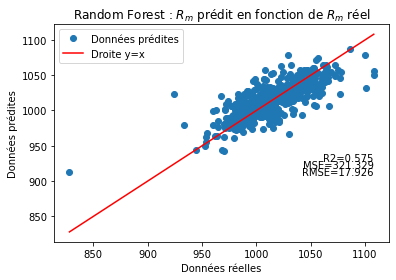

In [14]:
plt.title("Random Forest : $R_{m}$ prédit en fonction de $R_{m}$ réel")
plt.plot( Y_test_rm, Y_pred_rfr, 'o', label = "Données prédites")
plt.plot([min(Y_test_rm),max(Y_test_rm)], [min(Y_test_rm),max(Y_test_rm)], 'r', label = "Droite y=x")
plt.legend()
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr) + 20, s="R2=" + str(round(r2_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr) + 10, s="MSE=" + str(round(mse_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr), s="RMSE=" + str(round(rmse_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.show()

### Affichage des features

[0.02869095 0.14972277 0.04965534 0.0520681  0.03044614 0.01955896
 0.0264007  0.0346913  0.03107775 0.04579955 0.01087349 0.0299118
 0.03339384 0.06187456 0.09776335 0.03866896 0.03756035 0.05527275
 0.10783033 0.05873899]

 Feature ranking
1 C ppm 	 0.1497227713227267
2 soaking_hot C 	 0.10783033478549839
3 Heating C/s 660 to 750 	 0.09776335078374168
4 SKP elongation (%) 	 0.06187456382583769
5 soaking_cold C 	 0.058738989637260035
6 t_soaking_cold s 	 0.05527275323135423
7 Si ppm 	 0.05206810175459151
8 Mn ppm 	 0.049655335846048296
9 Nb ppm 	 0.045799545370134115
10 t_soaking_hot s 	 0.038668959703285294
11 Cooling C/s 	 0.03756035256579709
12 Ti ppm 	 0.0346912984889375
13 Linespeed (m/min) 	 0.03339383933204176
14 Cr ppm 	 0.031077748726694106
15 P ppm 	 0.03044614155584725
16 Mo ppm 	 0.029911804748733024
17 Th mm 	 0.02869094962661135
18 Al ppm 	 0.02640070245204167
19 S ppm 	 0.01955896364094247
20 B ppm 	 0.010873492601875886


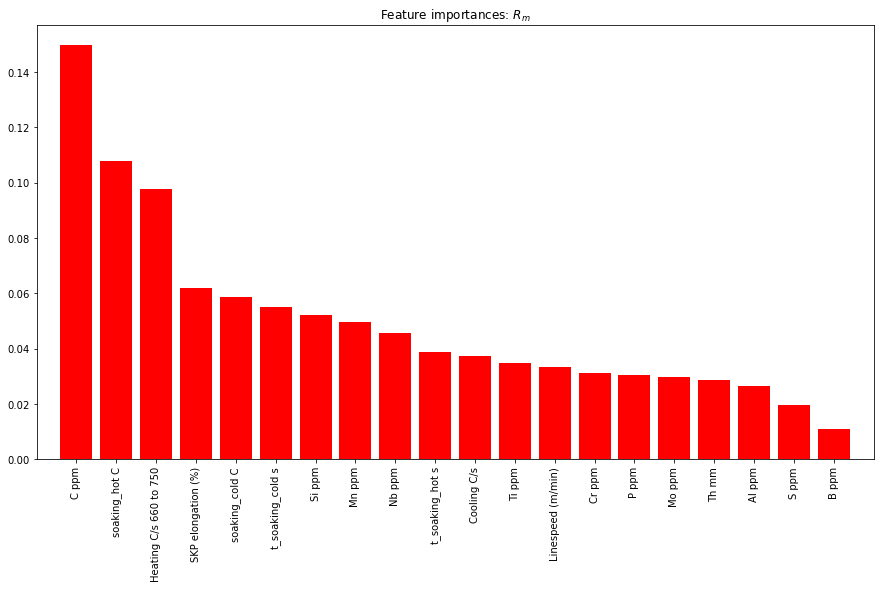

In [15]:
importances = rfr.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
feature_names = features.columns
# Print the feature ranking
print("\n Feature ranking")
 
for f in range(X_train.shape[1]):
    print(f+1, feature_names[indices[f]],'\t', importances[indices[f]])
 
# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances: $R_{m}$")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, len(importances)])
plt.show()

### Affichage de l'arbre

In [31]:
!pip3 install graphviz

  Using cached graphviz-0.19.1-py3-none-any.whl (46 kB)


AttributeError: 'GradientBoostingRegressor' object has no attribute 'tree_'

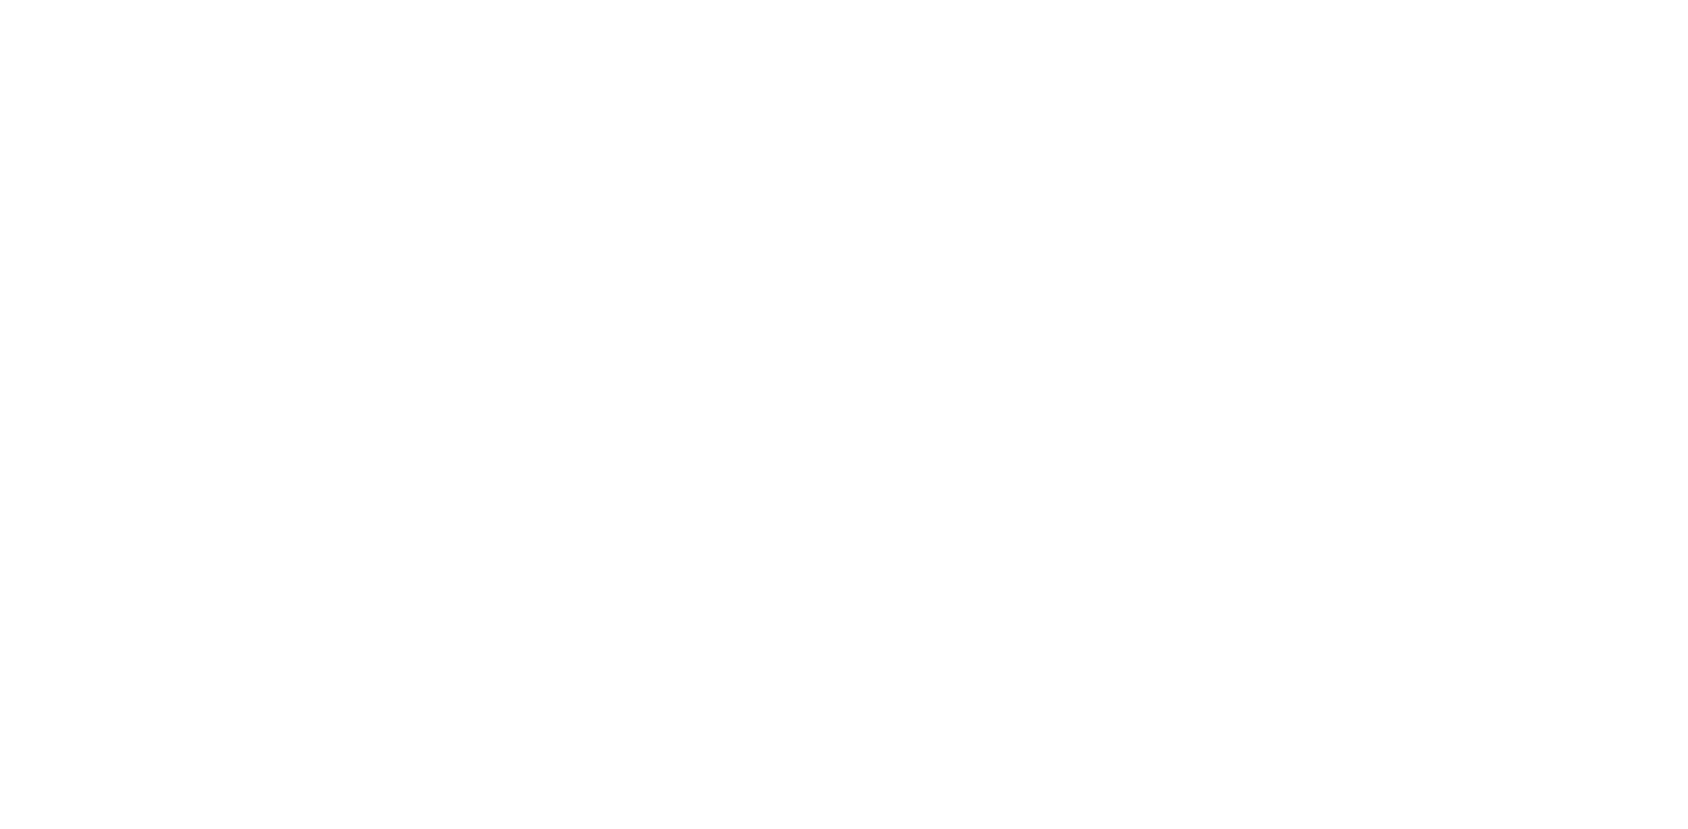

In [34]:
from sklearn import tree

plt.figure(figsize=(30,15))
_ = tree.plot_tree(rfr, feature_names=features.columns, filled=True, rounded=True )


### Prédiction de la résistance élastique à 0.2% $R_{e0.2}$

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

rfr_re02 = ExtraTreesRegressor(bootstrap=False, n_jobs=-1)

if APPLY_GRIDSEARCH:
    param_grid = { 
                "min_samples_split" : np.arange(4, 8, 2),
                'max_depth': np.arange(20, 28, 1),
                'max_features': np.arange(10, 20, 1),
                'n_estimators': np.arange(70, 120, 5),
                }

    rfr_cv = GridSearchCV(rfr_re02, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    rfr_cv.fit(X_train, Y_train_rm)
    
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)
    
    rfr_re02 = rfr_cv.best_estimator_
    
else:
    rfr_re02 = ExtraTreesRegressor(   bootstrap=False, 
                                    max_depth=23, 
                                    max_features=11,
                                    min_samples_split=6, 
                                    n_estimators=110, 
                                    n_jobs=-1)




rfr_re02.fit(X_train_re02, Y_train_re02)
print(rfr_re02.score(X_train_re02, Y_train_re02))
print(rfr_re02.score(X_test_re02, Y_test_re02))

Y_pred_rfr_re02 = rfr_re02.predict(X_test_re02)
print(Y_pred_rfr_re02.shape)
print(Y_test_re02.shape)

r2_re02   = r2_score(Y_test_re02, Y_pred_rfr_re02)
mse_re02  = mean_squared_error(Y_test_re02, Y_pred_rfr_re02)
rmse_re02 = mse_re02**(.5)

print("R2_score : ", r2_re02)
print("MSE : ", mse_re02)
print("RMSE : ", rmse_re02)

0.9664200861682758
0.8143879234214146
(593,)
(593,)
R2_score :  0.8143879234214146
MSE :  617.4143909185522
RMSE :  24.84782467176055


In [17]:
if APPLY_GRIDSEARCH:
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)

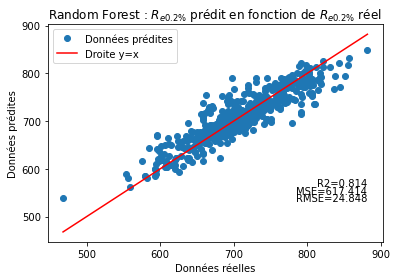

In [18]:
plt.title("Random Forest : $R_{e0.2\%}$ prédit en fonction de $R_{e0.2\%}$ réel")
plt.plot(Y_test_re02, Y_pred_rfr_re02, 'o', label = "Données prédites")
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.plot([min(Y_test_re02),max(Y_test_re02)], [min(Y_test_re02),max(Y_test_re02)], 'r', label = "Droite y=x")
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02) + 30, s="R2=" + str(round(r2_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02) + 15, s="MSE=" + str(round(mse_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02), s="RMSE=" + str(round(rmse_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.legend()
plt.show()

### Affichage des features

[0.02706476 0.02629166 0.04872541 0.01417503 0.01241849 0.01110508
 0.01318358 0.02540725 0.03894274 0.01180305 0.03466325 0.01461408
 0.04321376 0.17855115 0.0287993  0.0285738  0.03736843 0.03238165
 0.34303743 0.0296801 ]

 Feature ranking:
1 soaking_hot C 	 0.3430374343810106
2 SKP elongation (%) 	 0.17855114633701477
3 Mn ppm 	 0.048725406072001994
4 Linespeed (m/min) 	 0.04321376278403609
5 Cr ppm 	 0.03894274176163136
6 Cooling C/s 	 0.037368431235560245
7 B ppm 	 0.03466325028692966
8 t_soaking_cold s 	 0.03238165040121399
9 soaking_cold C 	 0.02968010018076731
10 Heating C/s 660 to 750 	 0.028799303842038437
11 t_soaking_hot s 	 0.028573803103415115
12 Th mm 	 0.027064763402881612
13 C ppm 	 0.026291659159827185
14 Ti ppm 	 0.02540724520138296
15 Mo ppm 	 0.014614079965937884
16 Si ppm 	 0.01417502532883327
17 Al ppm 	 0.013183575934129173
18 P ppm 	 0.012418493100924397
19 Nb ppm 	 0.011803049734649181
20 S ppm 	 0.011105077785814928


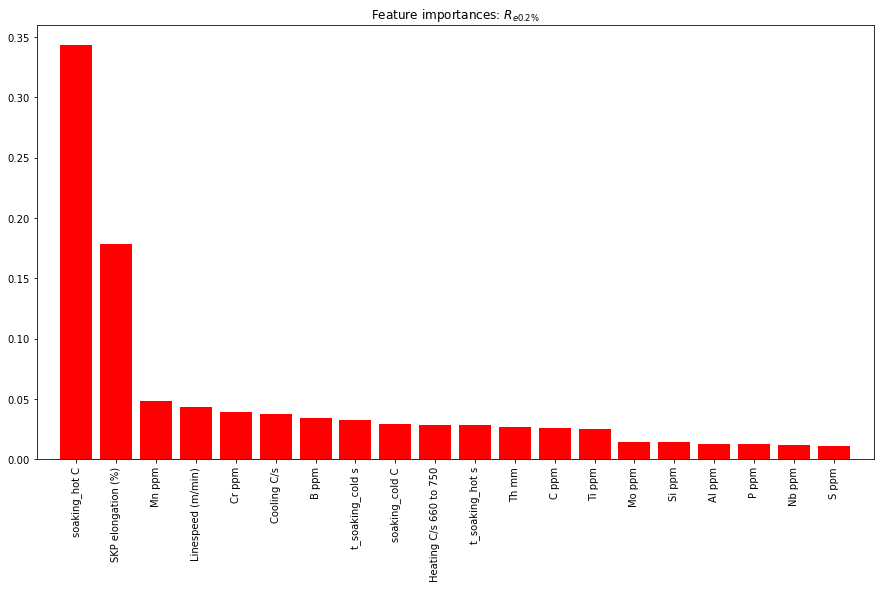

In [19]:
importances = rfr_re02.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
feature_names = features.columns
# Print the feature ranking
print("\n Feature ranking:")
 
for f in range(X_train.shape[1]):
    print(f+1, feature_names[indices[f]],'\t', importances[indices[f]])
 
# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances: $R_{e0.2\%}$")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, len(importances)])
plt.show()

### Prédiction de l'allongement à la rupture $A_\%$

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

rfr_A = ExtraTreesRegressor(bootstrap=False, n_jobs=-1)

if APPLY_GRIDSEARCH:
    param_grid = { 
                "min_samples_split" : np.arange(4, 8, 2),
                'max_depth': np.arange(20, 28, 1),
                'max_features': np.arange(10, 20, 1),
                'n_estimators': np.arange(70, 120, 5),
                }

    rfr_cv = GridSearchCV(rfr_A, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    rfr_cv.fit(X_train, Y_train_rm)
    
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)
    
    rfr_A = rfr_cv.best_estimator_
    
else:
    rfr_A = ExtraTreesRegressor(  bootstrap=False, 
                                max_depth=21, 
                                max_features=10,
                                min_samples_split=6, 
                                n_estimators=70, 
                                n_jobs=-1)




rfr_A.fit(X_train_A, Y_train_A)
print(rfr_A.score(X_train_A, Y_train_A))
print(rfr_A.score(X_test_A, Y_test_A))

Y_pred_rfr_A = rfr_A.predict(X_test_A)
print(Y_pred_rfr_A.shape)
print(Y_test_A.shape)


r2_A   = r2_score(Y_test_A, Y_pred_rfr_A)
mse_A  = mean_squared_error(Y_test_A, Y_pred_rfr_A)
rmse_A = mse_A**(.5)

print("R2_score : ", r2_A)
print("MSE : ", mse_A)
print("RMSE : ", rmse_A)

0.9009193018089388
0.45178803936963585
(593,)
(593,)
R2_score :  0.45178803936963585
MSE :  224.182111323289
RMSE :  14.972712223351152


In [21]:
if APPLY_GRIDSEARCH:
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)

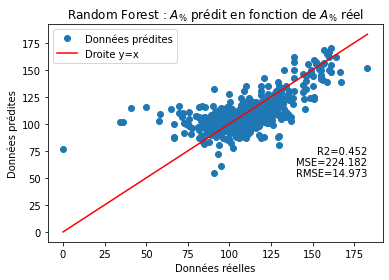

In [22]:
plt.title("Random Forest : $A_{\%}$ prédit en fonction de $A_{\%}$ réel")
plt.plot( Y_test_A, Y_pred_rfr_A, 'o',label = "Données prédites")
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.plot([min(Y_test_A),max(Y_test_A)], [min(Y_test_A),max(Y_test_A)], 'r', label = "Droite y=x")
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A) + 20, s="R2=" + str(round(r2_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A) + 10, s="MSE=" + str(round(mse_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A), s="RMSE=" + str(round(rmse_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.legend()
plt.show()

### Affichage des features

[0.03983097 0.02180286 0.0336662  0.02017748 0.02074913 0.0251853
 0.02207511 0.02817664 0.02675131 0.0201126  0.04277616 0.02521137
 0.09490872 0.06350702 0.04811093 0.05606685 0.07228729 0.05007596
 0.25278207 0.03574605]

 Feature ranking:
1 soaking_hot C 	 0.252782066936177
2 Linespeed (m/min) 	 0.09490871902213736
3 Cooling C/s 	 0.07228729461637189
4 SKP elongation (%) 	 0.06350701884275942
5 t_soaking_hot s 	 0.056066848612077023
6 t_soaking_cold s 	 0.05007595679543923
7 Heating C/s 660 to 750 	 0.04811093099616466
8 B ppm 	 0.04277615544136537
9 Th mm 	 0.03983097240782223
10 soaking_cold C 	 0.03574604671965881
11 Mn ppm 	 0.03366620033019052
12 Ti ppm 	 0.028176637549424854
13 Cr ppm 	 0.026751312540005363
14 Mo ppm 	 0.025211369169744407
15 S ppm 	 0.02518529857879483
16 Al ppm 	 0.02207510629924755
17 C ppm 	 0.021802856596462694
18 P ppm 	 0.02074913168064328
19 Si ppm 	 0.020177477746767064
20 Nb ppm 	 0.020112599118746553


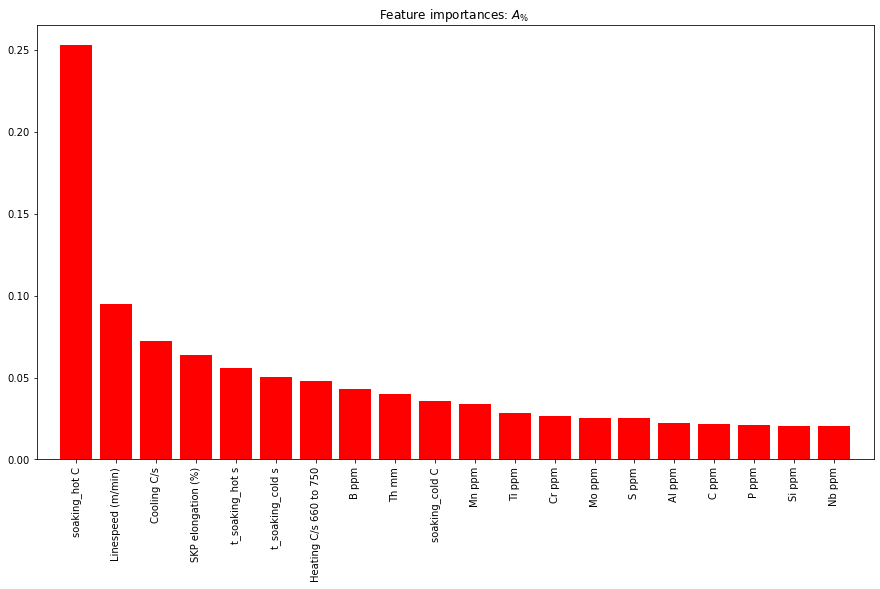

<class 'pandas.core.indexes.base.Index'>


In [23]:
importances = rfr_A.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
feature_names = features.columns
# Print the feature ranking
print("\n Feature ranking:")
 
for f in range(X_train.shape[1]):
    print(f+1, feature_names[indices[f]],'\t', importances[indices[f]])
 
# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances: $A_{\%}$ ")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, len(importances)])
plt.show()
#df.corr()["Ti ppm"]

print(type(feature_names))

# Enregistrement des modèles

In [24]:
import pickle

modele_path = "./modeles/"

# now you can save it to a file
with open(modele_path + 'random_forest_re02_3_upgrade.pkl', 'wb') as f:
    pickle.dump(rfr_re02, f)

with open(modele_path + 'random_forest_rm_3_upgrade.pkl', 'wb') as f:
    pickle.dump(rfr, f)
    
with open(modele_path + 'random_forest_A_3_upgrade.pkl', 'wb') as f:
    pickle.dump(rfr_A, f)  


# Chargement des modèles

In [25]:
import pickle
modele_path = "./modeles/"

with open(modele_path + 'random_forest_rm_3_upgrade.pkl', 'rb') as f:
    clf_rm = pickle.load(f)
print("-------------------------")
print("Résistance mécanique Rm")
print("-------------------------")
print("Train: ",clf_rm.score(X_train, Y_train_rm))
print("Test: ", clf_rm.score(X_test, Y_test_rm))

with open(modele_path + 'random_forest_re02_3_upgrade.pkl', 'rb') as f:
    clf_re02 = pickle.load(f)
    
print("-------------------------")
print("Résistance élastique Re02")
print("-------------------------")
print("Train: ", clf_re02.score(X_train_re02, Y_train_re02))
print("Test: ", clf_re02.score(X_test_re02, Y_test_re02))

with open(modele_path + 'random_forest_A_3_upgrade.pkl', 'rb') as f:
    clf_A = pickle.load(f)
print("-------------------------")
print("Allongement à la rupture A%")
print("-------------------------")
print("Train: ",clf_A.score(X_train_A, Y_train_A))
print("Test: ", clf_A.score(X_test_A, Y_test_A))


-------------------------
Résistance mécanique Rm
-------------------------
Train:  0.983305126919707
Test:  0.5750913345962396
-------------------------
Résistance élastique Re02
-------------------------
Train:  0.9664200861682758
Test:  0.8143879234214146
-------------------------
Allongement à la rupture A%
-------------------------
Train:  0.9009193018089388
Test:  0.45178803936963585
